# Converting json into dataframe

In [9]:
#Take a look at json from bash
%%bash
head -n37 NYET_format.jsonl

{
  "event": "message",
  "id": "020000009dd7d000434c0600000000000000000000000000",
  "service": false,
  "out": false,
  "from": {
    "id": "$01000000610c4901c98b7dfcf0c76782",
    "when": "2017-10-06 19:43:20",
    "peer_type": "user",
    "peer_id": 21564513,
    "first_name": "Милежик",
    "print_name": "Милежик",
    "flags": 196609,
    "last_name": "",
    "username": "Dee_Milezhik",
    "phone": "79637685254"
  },
  "text": "Кек",
  "flags": 256,
  "to": {
    "members_num": 15,
    "id": "$020000009dd7d0000000000000000000",
    "admin": {
      "id": "$01000000000000000000000000000000",
      "peer_type": "user",
      "peer_id": 0,
      "print_name": "user#0"
    },
    "peer_type": "chat",
    "peer_id": 13686685,
    "print_name": "NYET:_Фэтблэймеры,_фэтхэйтеры,_флеймбластеры_и_Димка",
    "flags": 1,
    "title": "NYET: Фэтблэймеры, фэтхэйтеры, флеймбластеры и Димка"
  },
  "unread": false,
  "date": 1507307026
}


In [27]:
#Setting up columns from json
filename2 = "NYET.jsonl"

data =[]

cols = ['event',
        'service',
        'out',
        'text',
        'date']

cols_from = ['peer_type',
             'peer_id',
             'first_name',
             'print_name',
             'last_name',
             'username',
             'phone']

cols_media = ['type']

all_cols = cols + cols_from + cols_media


In [28]:
#Looping through json to get data into python list of lists
with open(filename2,'r') as f:
    a = 0
    for line in f:
        current_row = []
        message = json.loads(line)
        for col in cols:
            current_row.append(message.get(col))
        for col in cols_from:
            current_row.append(message['from'].get(col))
        for col in cols_media:
            media = message.get('media')
            if isinstance(media,dict):
                current_row.append(media['type'])
            else:
                current_row.append('')
        data.append(current_row)

In [62]:
#Load into dataframe and dump into csv
import pandas as pd

df = pd.DataFrame(data, columns=all_cols)
df.to_csv('NYET.csv')
df.head(10)

,event,service,out,text,date,peer_type,peer_id,first_name,print_name,last_name,username,phone,type
0,message,False,False,Кек,1507307026,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
1,message,False,False,"Может так случиться, что и я",1507307025,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
2,message,False,False,Убей не помню,1507306892,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
3,message,False,False,Кто мёд заказывал,1507306886,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
4,message,False,False,Я,1507306869,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
5,message,False,True,Кто газировки заказывал?,1507306754,user,121143792,Gleb,Gleb_Lobov,Lobov,lobzison,79150026987,
6,message,False,False,None,1507305990,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,document
7,message,False,False,None,1507305980,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,photo
8,message,False,False,None,1507298641,user,90312891,Haze,Haze_Holy,Holy,Hazz3,79153688261,document
9,message,False,False,Ты посрал?,1507298627,user,90312891,Haze,Haze_Holy,Holy,Hazz3,79153688261,


# Analyzing data

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [236]:
#Filter out all bots
df = df[df.username.str.contains('(?i)bot$') == False]
df2 = df[['date', 'print_name', 'text', 'type']].copy()
#Convert time from unix into pandas
df2.date = pd.to_datetime(df2.date,unit='s')
df2.head(10)



,date,print_name,text,type
0,2017-10-06 16:23:46,Милежик,Кек,
1,2017-10-06 16:23:45,Милежик,"Может так случиться, что и я",
2,2017-10-06 16:21:32,Милежик,Убей не помню,
3,2017-10-06 16:21:26,Милежик,Кто мёд заказывал,
4,2017-10-06 16:21:09,Милежик,Я,
5,2017-10-06 16:19:14,Gleb_Lobov,Кто газировки заказывал?,
6,2017-10-06 16:06:30,Милежик,None,document
7,2017-10-06 16:06:20,Милежик,None,photo
8,2017-10-06 14:04:01,Haze_Holy,None,document
9,2017-10-06 14:03:47,Haze_Holy,Ты посрал?,


In [237]:
print(df2.groupby('type').size())
b = df2.date.min()
e = df2.date.max()
print('\n\nFirst message : {} \nLast message : {}'.format(b,e))

type
               216563
contact             2
document         9362
geo                 6
photo            3574
unsupported         7
webpage          5437
dtype: int64


First message : 2015-08-27 15:05:54 
Last message : 2017-10-06 16:23:46


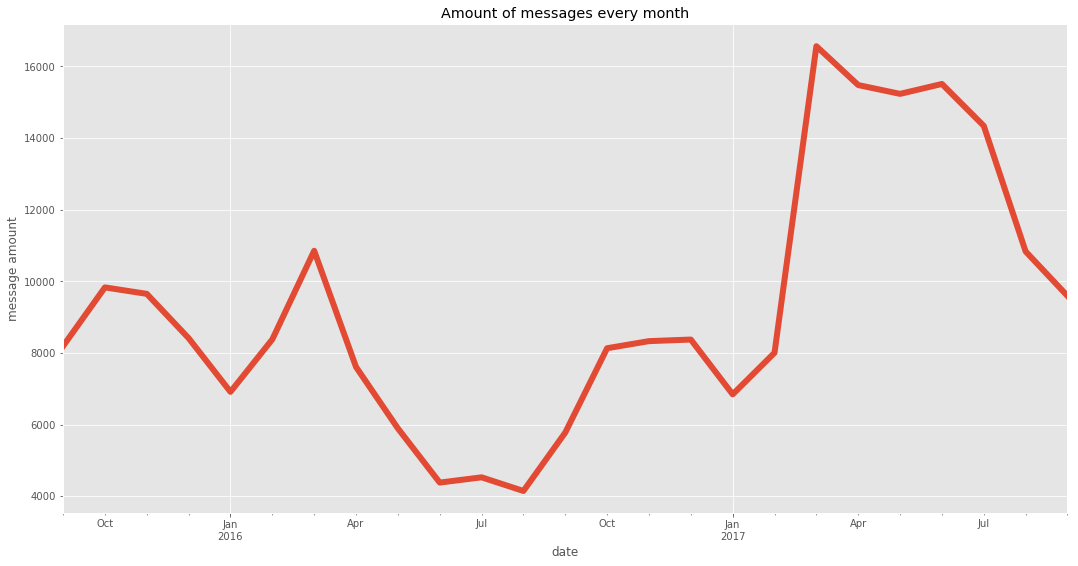

In [238]:
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (18, 9)
#Remove partial months
df3 = df2[(df2.date >= '2015-09-01') & (df2.date < '2017-10-01')].copy()

per = df3.date.dt.to_period("m")

plt.ylabel('message amount')
df3.groupby(per).size().plot(linewidth=6).set_title('Amount of messages every month')

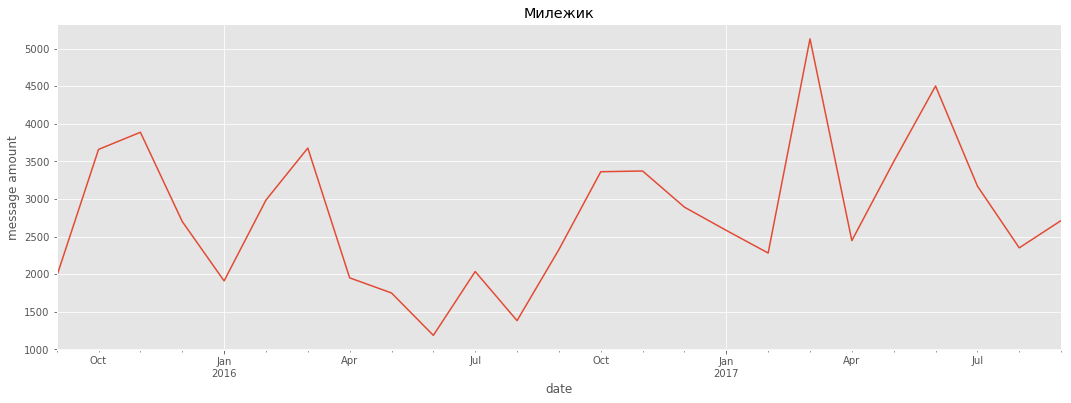

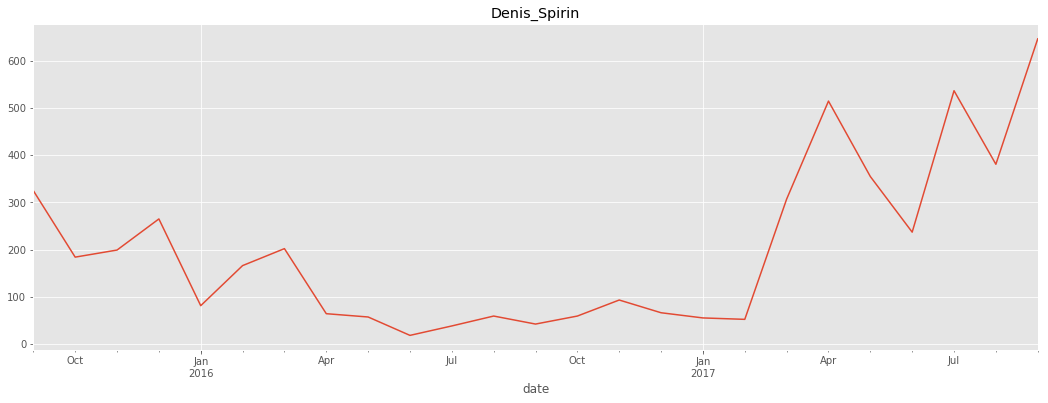

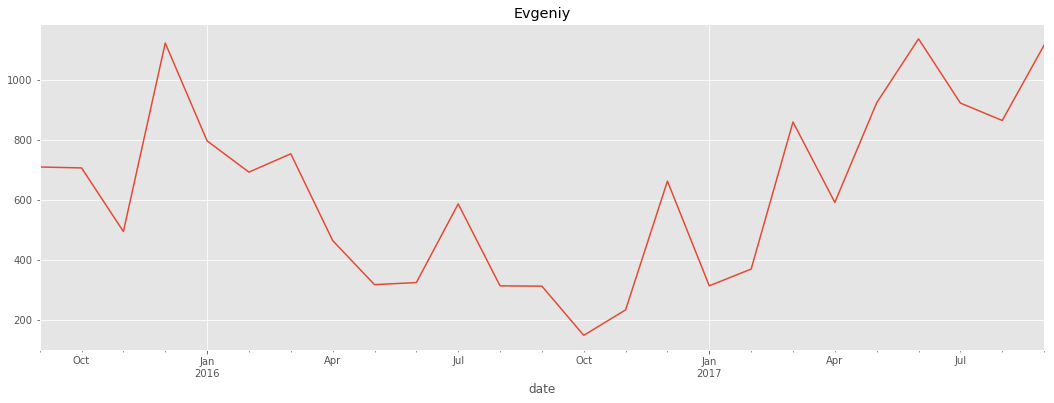

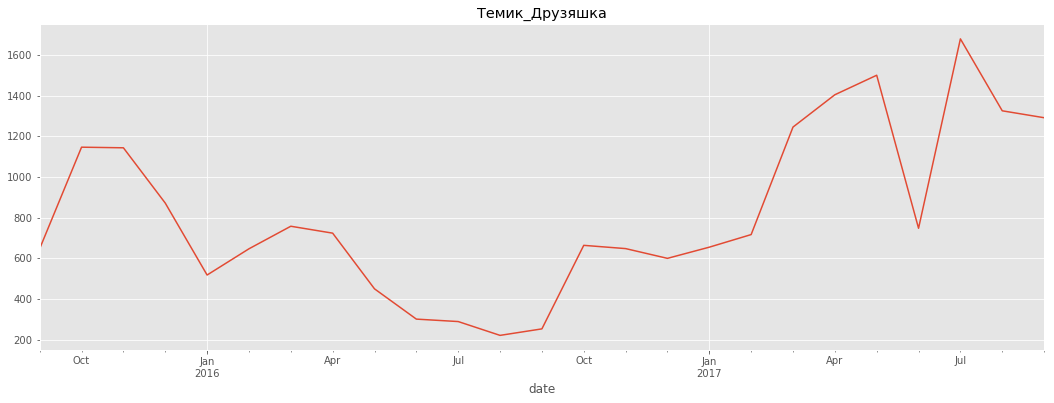

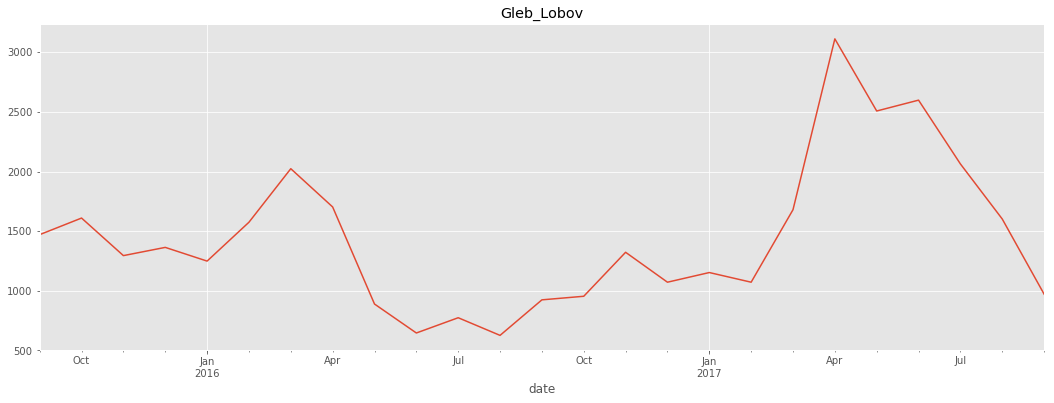

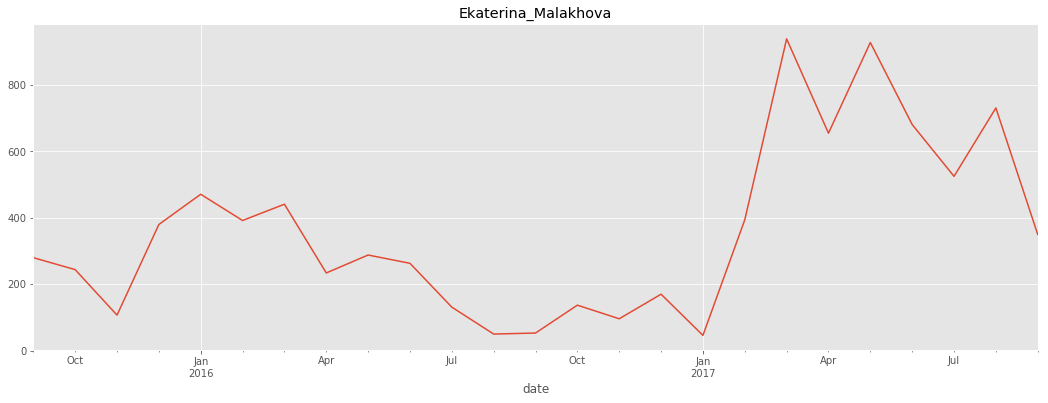

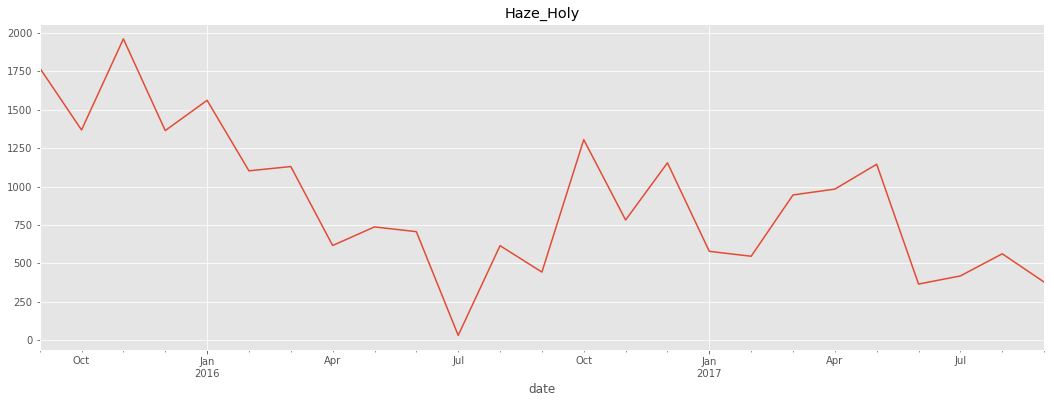

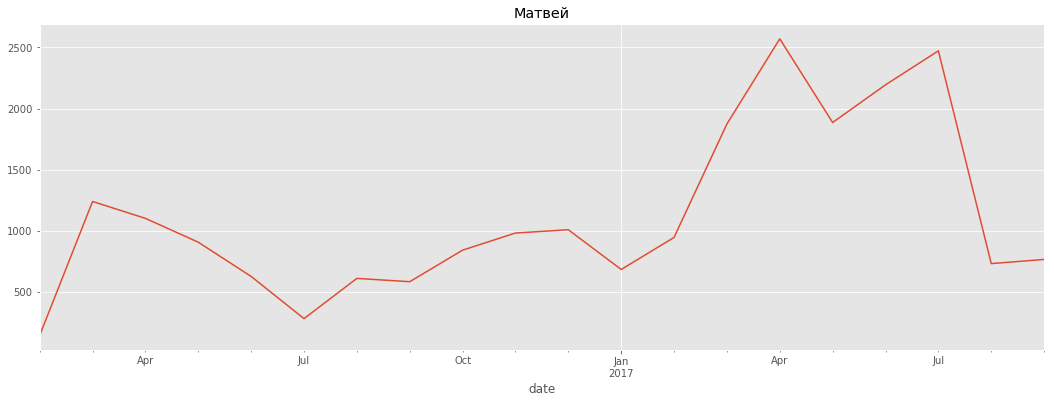

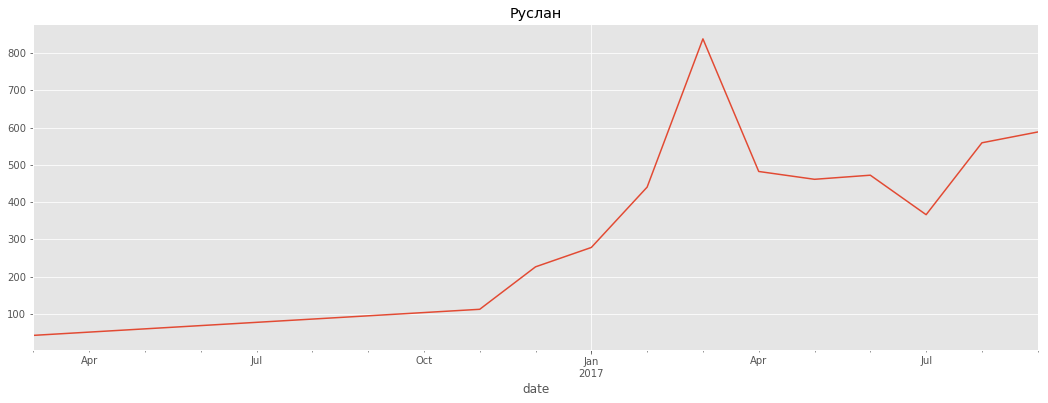

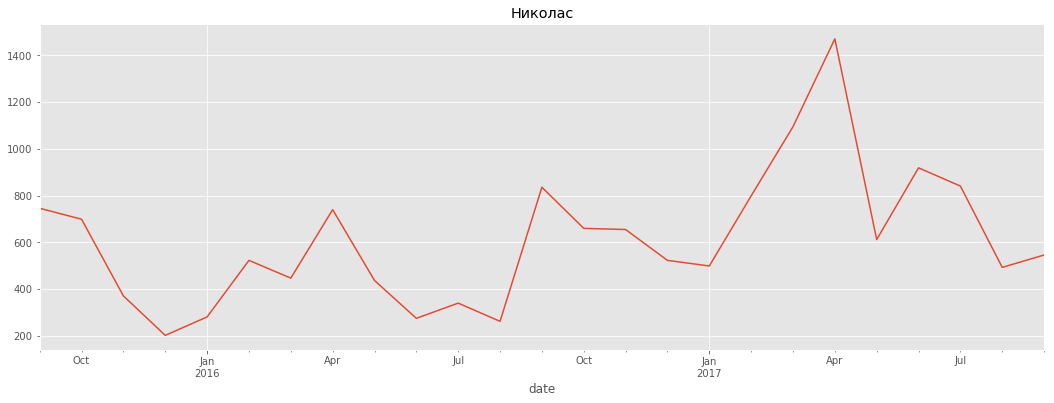

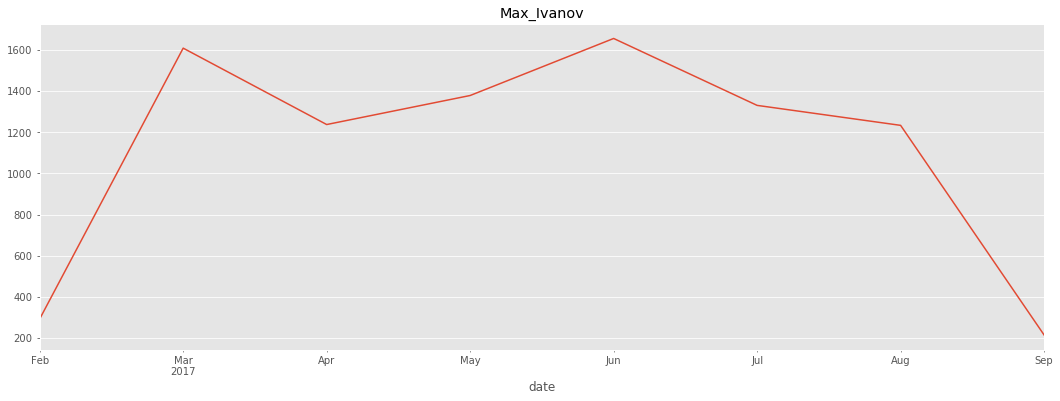

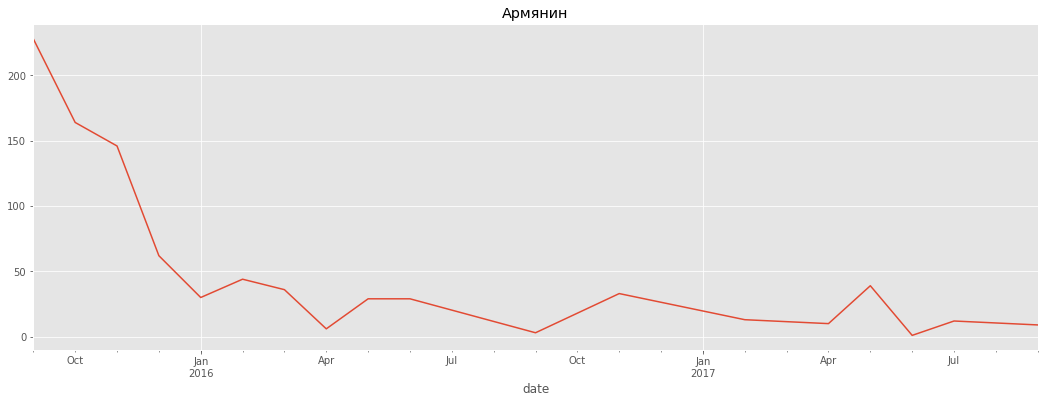

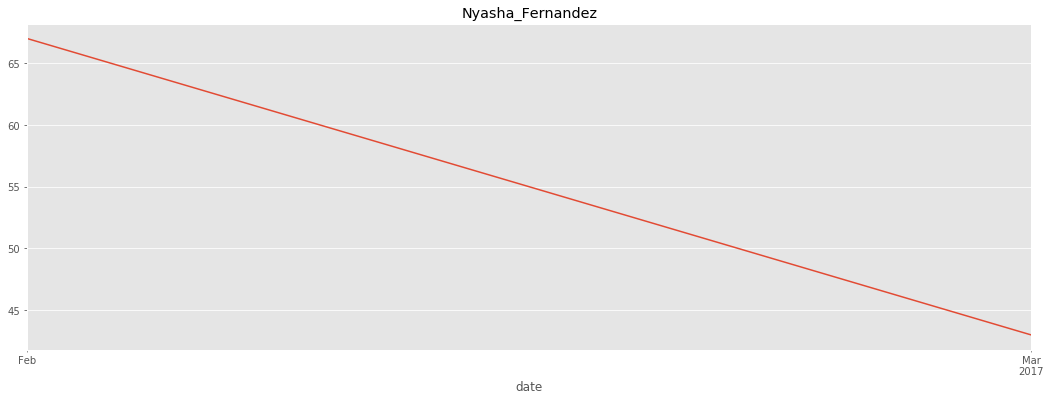

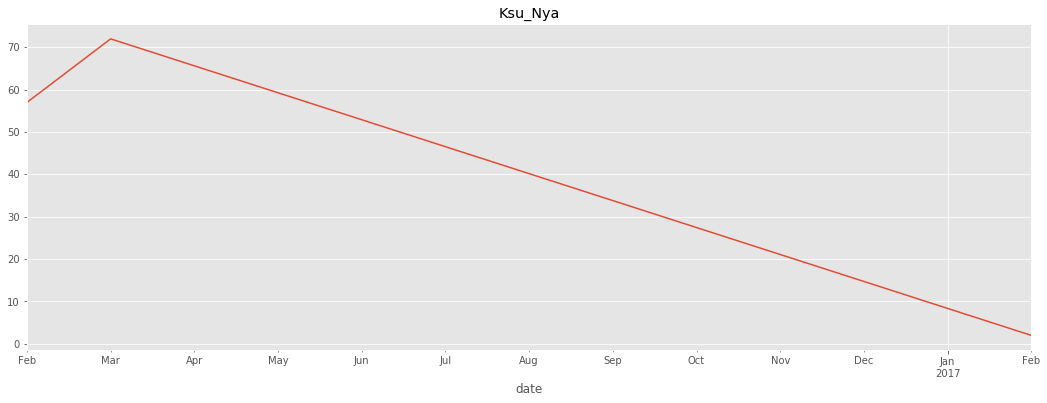

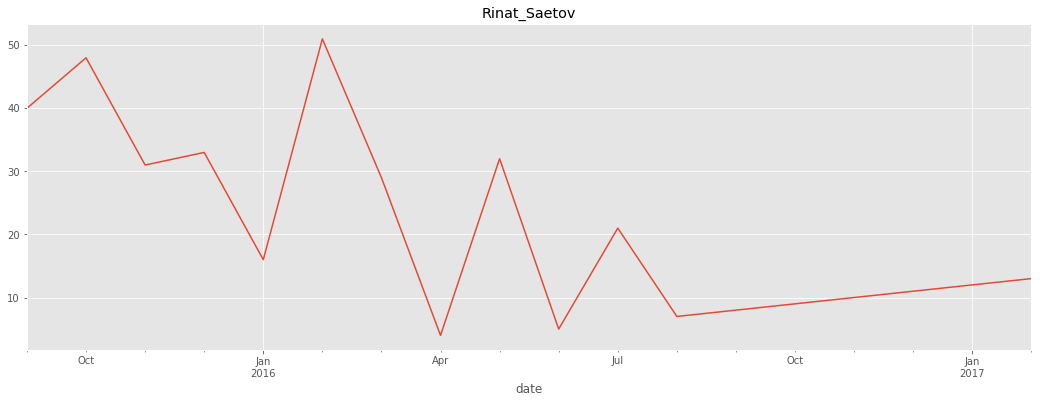

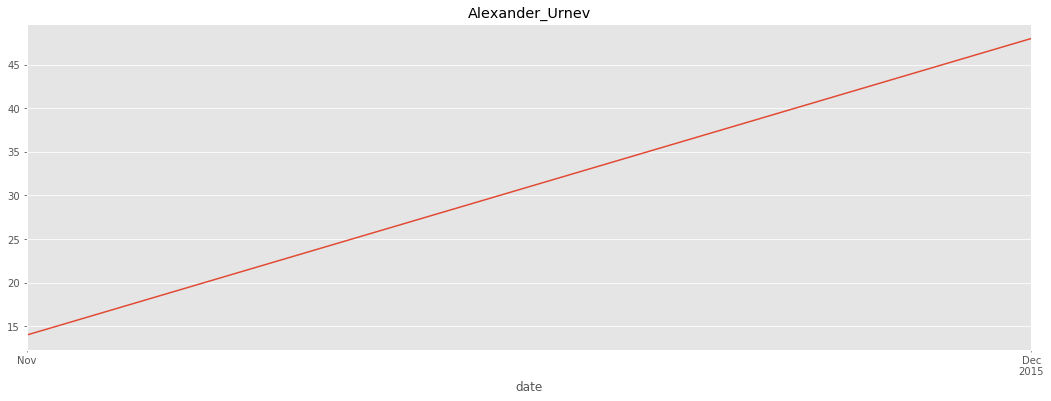

In [239]:
#Amount of messages for every user
matplotlib.rcParams['figure.figsize'] = (18, 6)
users = df3["print_name"].unique()
plt.ylabel('message amount')

for user in users:
    df3[df3.print_name == user].groupby(per).size().plot(kind="line").set_title(user)
    plt.show()

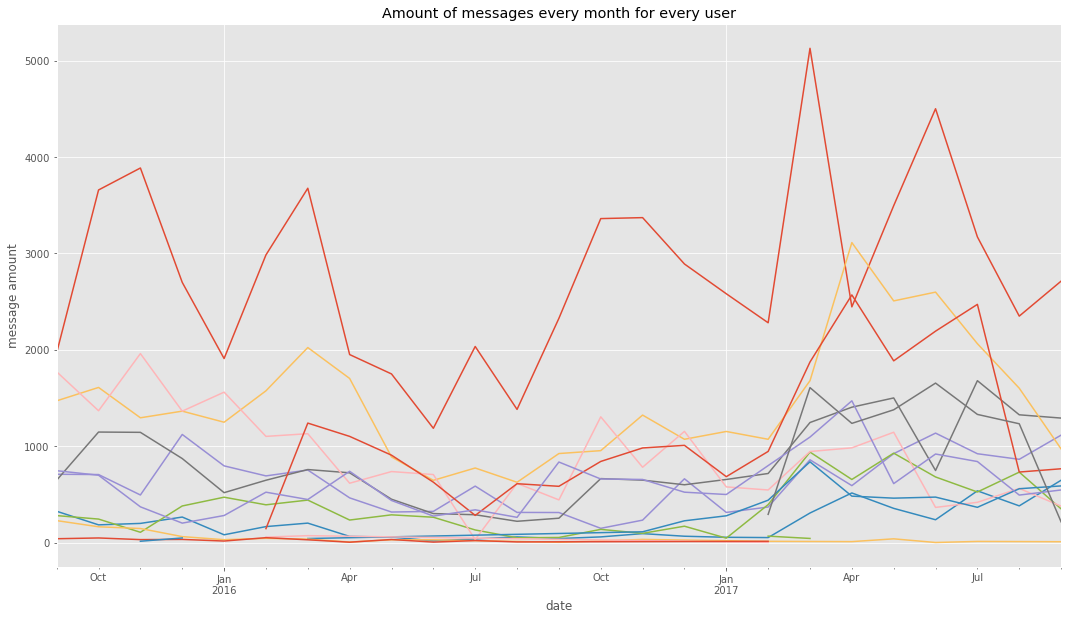

In [240]:
#All users activity on the same plot
matplotlib.rcParams['figure.figsize'] = (18, 10)
plt.ylabel('message amount')

for user in users:
    df3[df3.print_name == user].groupby(per).size().plot(kind="line").set_title('Amount of messages every month for every user')

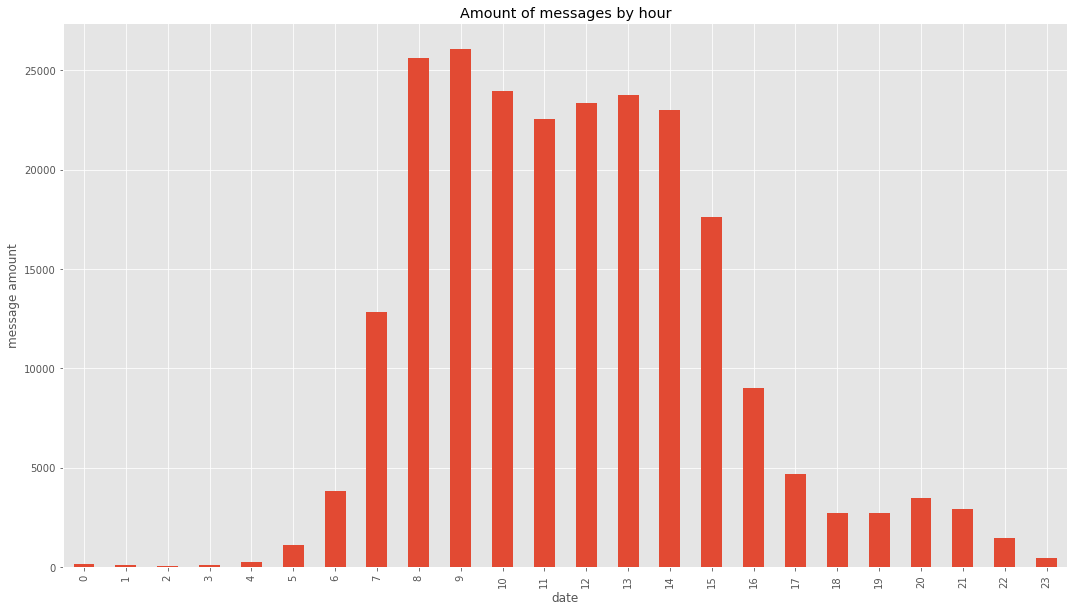

In [242]:
plt.ylabel('message amount')
df3.groupby(df3.date.dt.hour).size().plot(kind="bar").set_title('Amount of messages by hour')